# Homework 5 -- Problem 1

In [2]:
#imports
from importlib import reload

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import ventilated_thermocline

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [4]:
def contour_plot(field, title=None, cmap='jet', nlevels=8, clabel=True, ax=None,
                x=None, y=None, shadx=None, shady=None,
                outx=None, outy=None,
                poolx=None, pooly=None):
    cm = plt.get_cmap(cmap)
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = plt.gca()

    if x is not None:
        CS = ax.contour(field.T, levels=nlevels, cmap=cm,
                       extent=(x.min(), x.max(), y.min(), y.max()))
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
    else:
        CS = ax.contour(field.T, levels=nlevels, cmap=cm)
        
    # Lines
    if shadx is not None:
        ax.plot(shadx, shady, 'k-', label='Shadow zone')

    if outx is not None:
        ax.plot(outx, outy, 'k--', label=r'$\theta_2$')    

    if poolx is not None:
        ax.plot(poolx, pooly, 'k:', label='Pool')    

        
    if clabel:
        ax.clabel(CS, inline=True, fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=18.)
    
    # Legend
    legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                   fontsize=13.)


    #ax.set_aspect('equal', 'datalim')

In [13]:
def NS_plot(yarr, ixt, h, hp1, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(10,8))
        ax = plt.gca()
    #
    ax.plot(yarr[ixt,:], -h[ixt, :], 'b', label=r'$z_3 = h_1 + h_2$')
    ax.plot(yarr[ixt,:], -hp1[ixt, :], 'r', label=r'$z_2 = h_1$')
    #
    ax.set_xlabel('y (km)')
    ax.set_ylabel('depth (m)')
    ax.set_title('(c) N-S cross-section')

In [14]:
def EW_plot(xarr, iyt, h, hp1, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(10,8))
        ax = plt.gca()
    #
    ax.plot(xarr[:, iyt], -h[:, iyt], 'b', label=r'$z_3 = h_1 + h_2$')
    ax.plot(xarr[:, iyt], -hp1[:, iyt], 'r', label=r'$z_2 = h_1$')
    #
    ax.set_xlabel('x (km)')
    ax.set_ylabel('depth (m)')
    ax.set_title('(d) E-W cross-section')

## (a) North Atlantic

## Fiducial parameters -- eyeballed from Fig 2a

#### $\theta_0 = 60$N, $\theta_2 = 50$N, $\rho_1 = 1026.$ kg/m$^3$, $\rho_2 = 1026.5$ kg/m$^3$

#### $w_0 = 2\times 10^{-6}$m/s, $H_2=250$m, $L_x = 5000$km

In [27]:
NA_param = dict(theta0=60., theta2=50., rho1=1026.0,rho2=1026.5,
               Lx=5e6, W0=2e-6, H2=250., max_depth=-1200)

In [29]:
reload(ventilated_thermocline)
xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param)

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))


### Plots

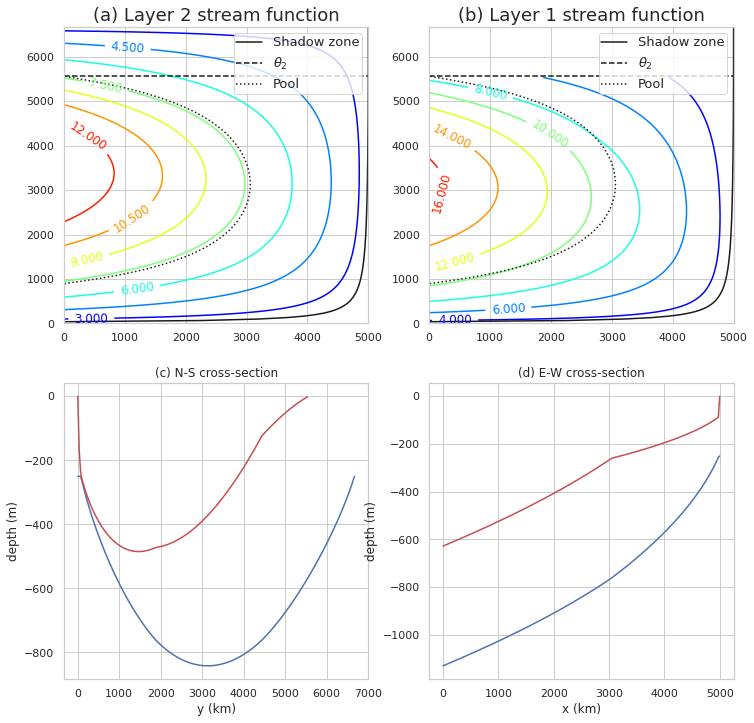

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
# Contour plots
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function', ax=ax1)
contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function', ax=ax2)
# Heights
NS_plot(yarr, ixt, h, hp1, ax=ax3)
EW_plot(xarr, iyt, h, hp1, ax=ax4)

### Figure (a) shows the Layer 2 stream function countours and the Pool (dashed line) and shadow zone (solid black line).  The former shows where the circulation is arises from the subduction line.  PV homogenization could occur provided there were drag between the two layers. The latter shows the region beyond which there is no circulation in Layer 2.

### In Figure (b), we see the stream function for Layer 1.  There is no particular excitement here, in part because the shadow zone extends beyond all the contours drawn.

## (b) North Pacific

## Fiducial parameters -- eye-balled from Fig 2b

#### $\theta_0 = 60$N, $\theta_2 = 45$N, $\rho_1 = 1024.$ kg/m$^3$, $\rho_2 = 1025.5$ kg/m$^3$

#### $w_0 = 1\times 10^{-6}$m/s, $H_2=200$m, $L_x = 15000$km

In [22]:
reload(ventilated_thermocline)
xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    theta0=60., theta2=45., rho1=1024.0,rho2=1025.5,
               Lx=15e6, W0=1e-6, H2=200., max_depth=-1200)

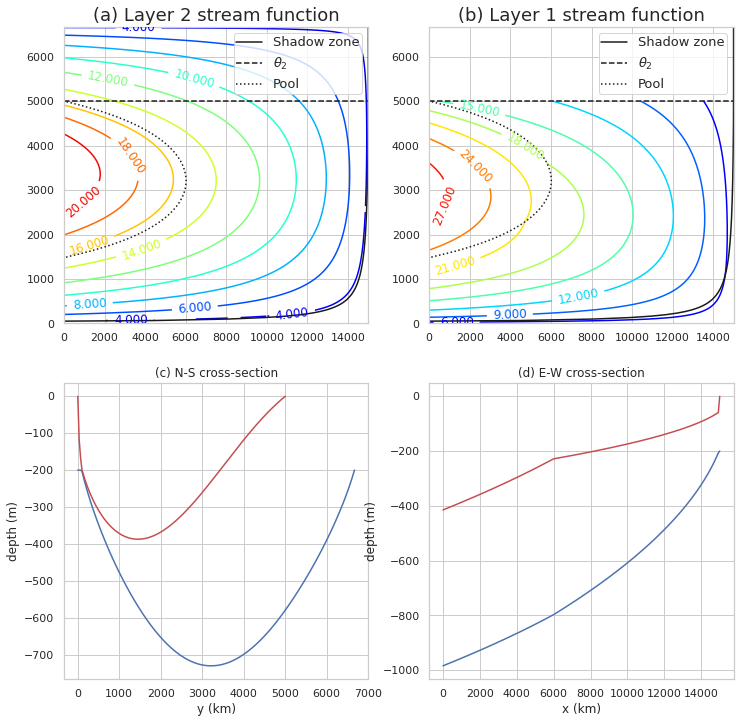

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
# Contour plots
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function', ax=ax1)
contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function', ax=ax2)
# Heights
NS_plot(yarr, ixt, h, hp1, ax=ax3)
EW_plot(xarr, iyt, h, hp1, ax=ax4)

### The circulation is stronger in the Pacific (higher peak values).  I otherwise perceive no other qualitative differences.  

## (c) Varying parameters in the North Atlantic.

### Varying $\theta_0$

In [36]:
NA_param_hightheta0 = NA_param.copy()
NA_param_hightheta0['theta0'] = 70.
#
NA_param_lowtheta0 = NA_param.copy()
NA_param_lowtheta0['theta0'] = 55.

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanogra

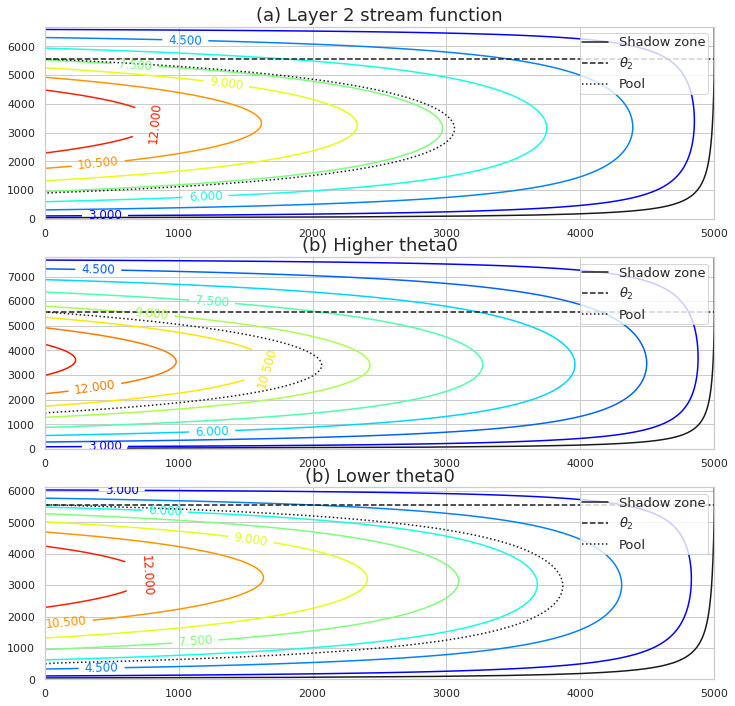

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
#
xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param)
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function', ax=ax1)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_hightheta0)
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Higher theta0', ax=ax2)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_lowtheta0)
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Lower theta0', ax=ax3)

### Higher $\theta_0$ leads to a smaller pool and vice-versa.  No other substantial changes.

## Varying $\theta_2$

In [47]:
NA_param_hightheta2 = NA_param.copy()
NA_param_hightheta2['theta2'] = 55.
#
NA_param_lowtheta2 = NA_param.copy()
NA_param_lowtheta2['theta2'] = 40.

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanogra

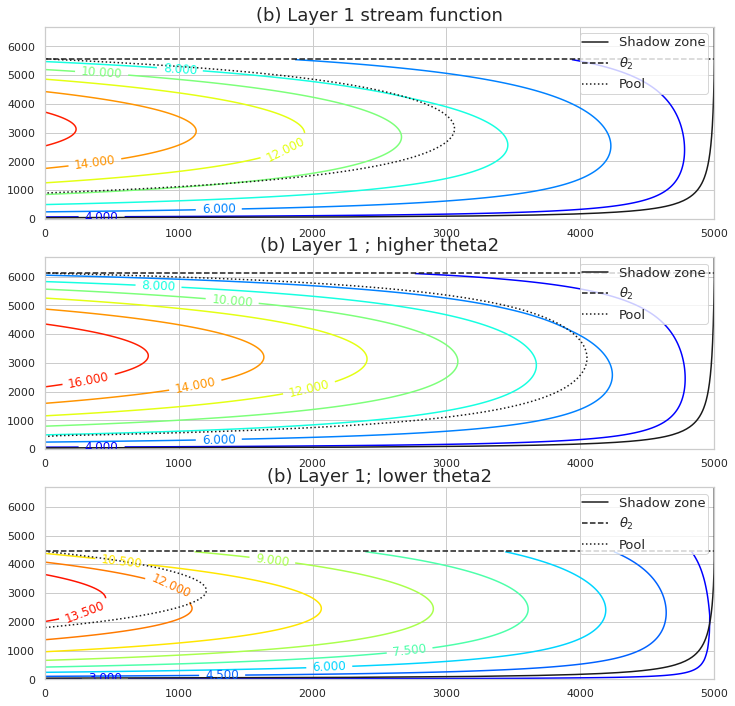

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))


xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param)

contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function', ax=ax1)


#contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
 #           outx=outx, outy=outy, poolx=poolx, pooly=pooly,
  #          title='(a) Layer 2 stream function', ax=ax1)



xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_hightheta2)

contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 ; higher theta2', ax=ax2)

#contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
#            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
 #           title='(b) Higher theta2', ax=ax2)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_lowtheta2)
#contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
#            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
#            title='(b) Lower theta2', ax=ax3)
contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1; lower theta2', ax=ax3)

### Increasing $\theta_2$  increases the pool size and the circulation.  And vice-versa

### Varying $W_0$

In [49]:
NA_param_highw0 = NA_param.copy()
NA_param_highw0['W0'] = 4e-6
#
NA_param_loww0 = NA_param.copy()
NA_param_loww0['W0'] = 1e-6

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanogra

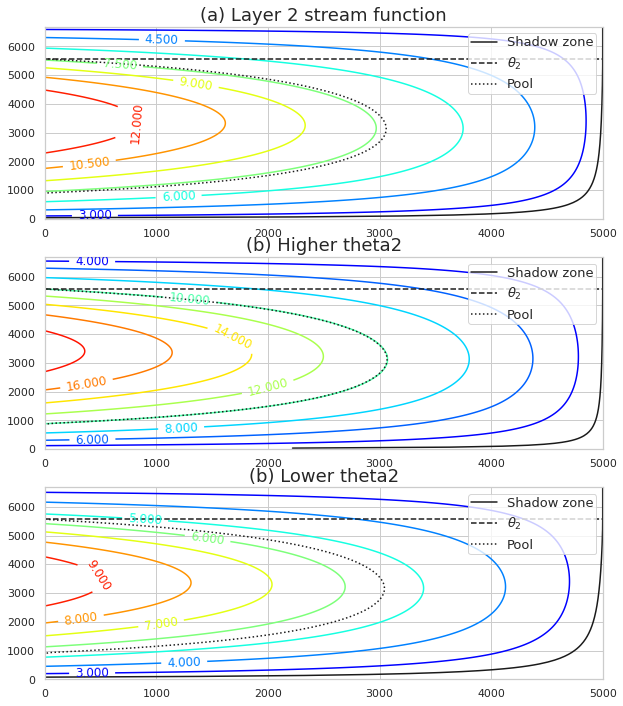

In [55]:
psi = 2
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))


xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function', ax=ax1)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function', ax=ax1)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_highw0)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 ; higher w0', ax=ax2)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Higher theta2', ax=ax2)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_loww0)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1; lower w0', ax=ax3)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Lower theta2', ax=ax3)

### I note two effects.  Higher $W_0$ gives higher circulation and reduces the size of the shadow zone.  And vice versa.

## Varying $\rho_1$ and $\rho_2$

In [56]:
NA_param

{'theta0': 60.0,
 'theta2': 50.0,
 'rho1': 1026.0,
 'rho2': 1026.5,
 'Lx': 5000000.0,
 'W0': 2e-06,
 'H2': 250.0,
 'max_depth': -1200}

In [57]:
NA_param_highrho = NA_param.copy()
NA_param_highrho['rho1'] = 1026.5
NA_param_highrho['rho2'] = 1027.0
#
NA_param_lowrho = NA_param.copy()
NA_param_lowrho['rho1'] = 1025.5
NA_param_lowrho['rho2'] = 1026.0

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanogra

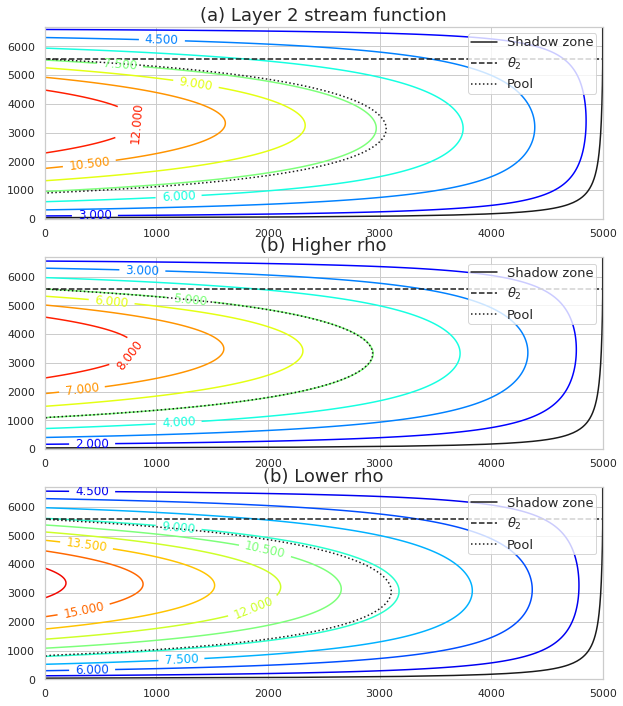

In [59]:
psi = 2
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))


xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function', ax=ax1)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function', ax=ax1)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_highrho)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 ; higher rho', ax=ax2)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Higher rho', ax=ax2)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_lowrho)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1; lower rho', ax=ax3)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Lower rho', ax=ax3)

### The primary effect is on the circulation seed with higher circulations at lower $\rho$.  One also notes the pool is larger for lower $\rho$.

## Varying $H_2$

In [61]:
NA_param_highH = NA_param.copy()
NA_param_highH['H2'] = 300.
#
NA_param_lowH = NA_param.copy()
NA_param_lowH['H2'] = 200.

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  we[:,j]=-W0*f0*f0*np.sin(np.pi*f[j]/f0)/(f[j]*f[j])
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  fac=1/(D0fact*np.sin(np.pi*f[j]/f0))
/tank/xavier/Oceanogra

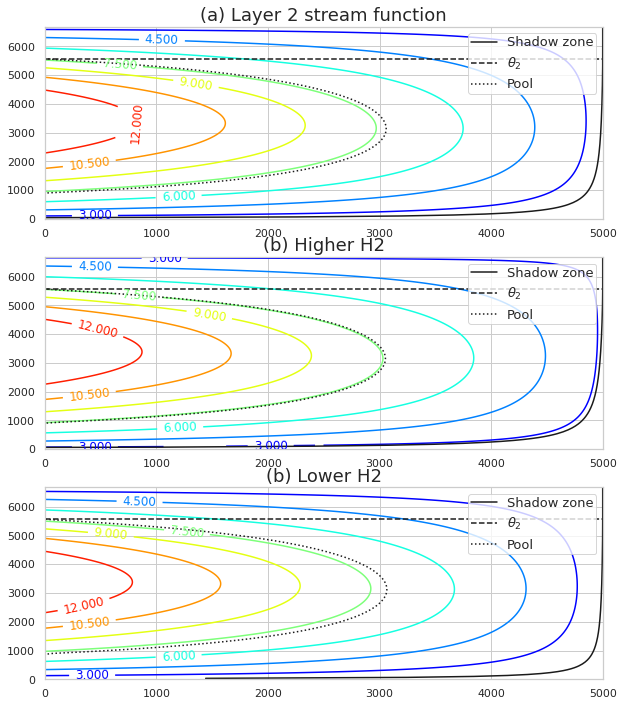

In [62]:
psi = 2
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))


xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function', ax=ax1)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function', ax=ax1)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_highH)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 ; higher H2', ax=ax2)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Higher H2', ax=ax2)

xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers(
    **NA_param_lowH)

if psi == 1:
    contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1; lower H2', ax=ax3)
else:
    contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(b) Lower H2', ax=ax3)

### Higher $H_2$ increases the size of the shadow zone.  Little other substantial effect.

## (d) Global warming will shift $\theta_2$ to higher values.  From our plots above, this will mean an increase in the pool and circulation strength.

----

---- 

# Testing

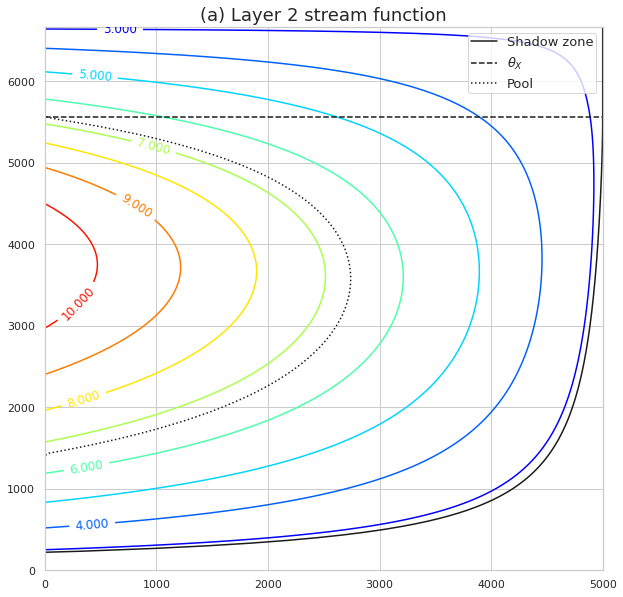

In [71]:
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function')

In [7]:
np.sum(np.isfinite(psi1))

33567

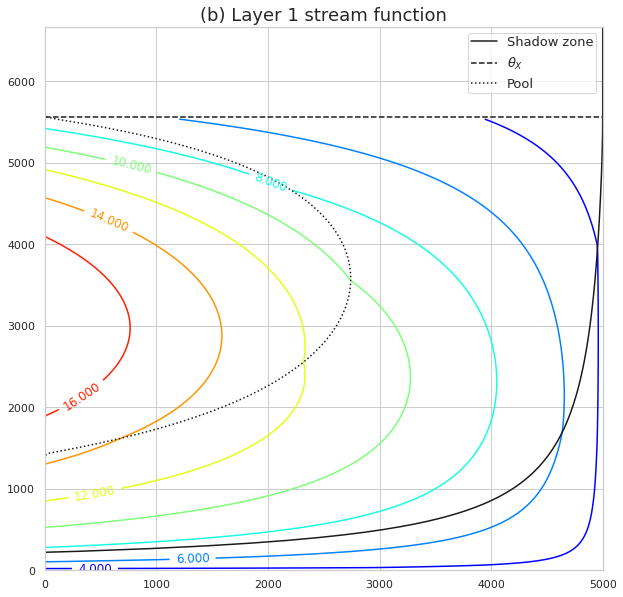

In [72]:
contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 1 stream function')

# Heights

## N-S

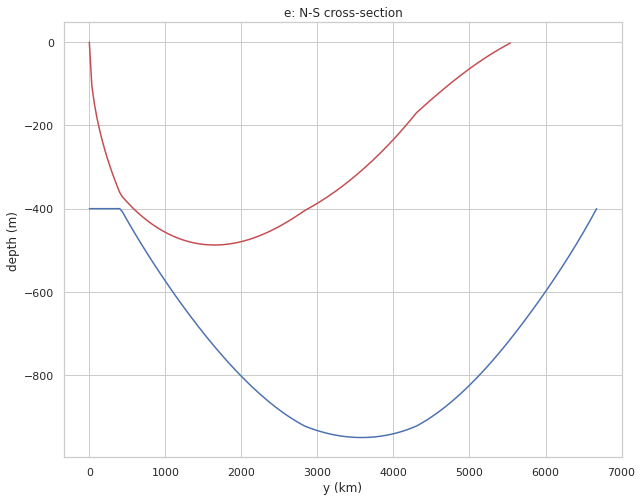

In [92]:
NS_plot(yarr, ixt, h, hp1, ax=None)

## E-W

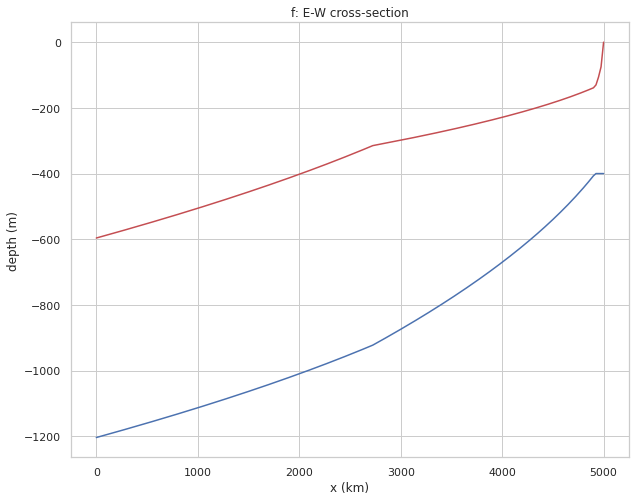

In [96]:
EW_plot(xarr, iyt, h, hp1, ax=None)